# Laplacian filters

Laplacian filters use the second derivative of the image intensity, measuring the rate at which the first derivatives change. This determines if a change in adjacent pixel values is from an edge or continuous progression. 

They are more sensitive to small changes in intensity, and can be used to detect both edges and corners. 

They are also more prone to noise, which can lead to false edges being detected. Therefore the image is often Gaussian smoothed before applying the Laplacian filter. 

Unlike the gradient-based operators, no directional information about the edge is given.

The Laplacian operator approximates the second derivative:

<img src="derivative.png" width="320">


The derivatives can be estimated using the discrete difference approximations with 3x3 convolution mask:

<img src="mask.png" width="220">

The sum of all kernel elements must be zero for the filter to give a zero response in homogeneous areas.

## Implementation

In [46]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
import canny.utils.utils as utils
import cv2
import os

In [50]:
def load_data(dir_name):    
    imgs = []
    for filename in os.listdir(dir_name):
        if os.path.isfile(dir_name + '/' + filename):
            img = cv2.imread(dir_name + '/' + filename)
            imgs.append(img)
    return imgs

def apply_operator_to_images(image_list, operator):
    processed_images = []
    for image in image_list:
        edges = operator(image)
        processed_images.append(edges)
    return processed_images

def show_edges(original_images, processed_images):
    
    fig, axes = plt.subplots(len(original_images), 2, figsize=(10, 10))

    for i, (image, processed_image) in enumerate(zip(original_images, processed_images)):
        axes[i][0].imshow(image, cmap='gray')
        axes[i][0].axis('off')
        axes[i][0].set_title('Original')
        axes[i][1].imshow(processed_image, cmap='gray')
        axes[i][1].axis('off')
        axes[i][1].set_title('Processed')



In [54]:
def laplacian_filter(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.GaussianBlur(image, (3, 3), 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.Laplacian(image, -1, ksize=3) #it calls internally the Sobel operator
    return image

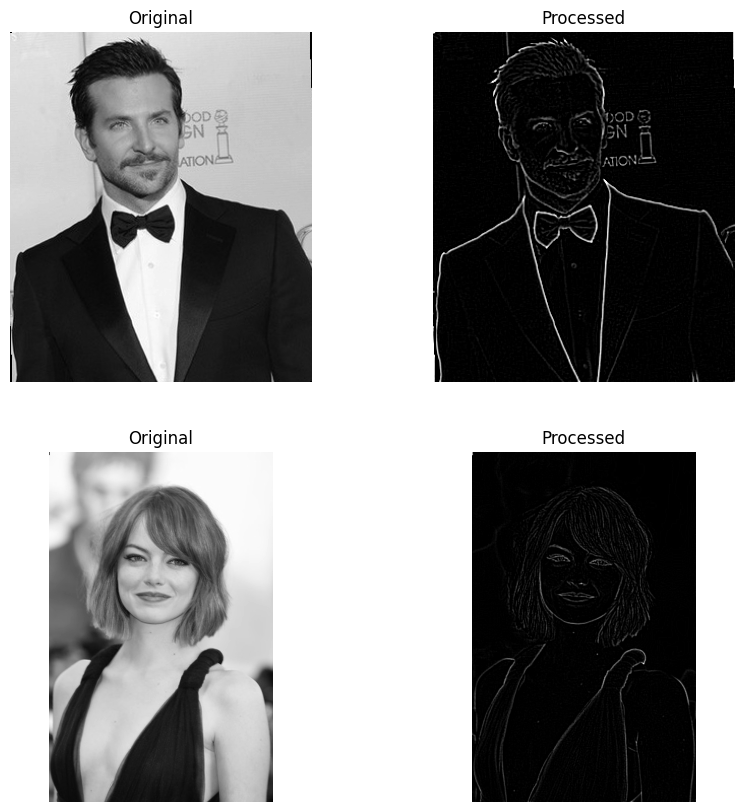

In [55]:
images = load_data('../canny/faces_imgs')

laplacian_results = apply_operator_to_images(images, laplacian_filter)
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]
show_edges(images, laplacian_results)